# CASO DE ESTUDIO. PELÍCULAS

In [73]:
import pandas as pd

movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
ratings = pd.read_csv('ratings.csv')

In [74]:
movies.head(4) #primeras 4 líneas

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance


In [75]:
ratings.tail(7) #últimas 7 líneas

,userId,movieId,rating,timestamp
20000256,138493,66762,4.5,1255805408
20000257,138493,68319,4.5,1260209720
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944
20000262,138493,71619,2.5,1255811136


In [76]:
tags.iloc[[0,20,2000]] #se extraen varias filas

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
20,65,6539,treasure,1368149949
2000,910,68554,conspiracy theory,1368043943


In [97]:
#parseo del timestamp y orden de más antiguo a más nuevo
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')
tags.sort_values(by='parsed_time')

,userId,movieId,tag,timestamp,parsed_time
333932,100371,2788,monty python,1135429210,2005-12-24 13:00:10
333927,100371,1732,coen brothers,1135429236,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,1135429248,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,1135429371,2005-12-24 13:02:51
333939,100371,5004,peter sellers,1135429399,2005-12-24 13:03:19
...,...,...,...,...,...
290535,88044,106782,profanity,1427754096,2015-03-30 22:21:36
288375,87797,215,Vienna,1427755801,2015-03-30 22:50:01
158763,46072,3409,premonition,1427760726,2015-03-31 00:12:06
158780,46072,6058,premonition,1427760764,2015-03-31 00:12:44


## Estadísticas

In [78]:
n_tags = tags['tag'].value_counts() #nº de repeticiones de cada tipo de tag
n_tags

sci-fi                           3384
based on a book                  3281
atmospheric                      2917
comedy                           2779
action                           2657
                                 ... 
Paul Adelstein                      1
the wig                             1
killer fish                         1
genetically modified monsters       1
topless scene                       1
Name: tag, Length: 38643, dtype: int64

In [79]:
ratings.describe() #obtiene los parámetros de todas las columnas del df de notas 

,userId,movieId,rating,timestamp
count,2.000026e+07,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00,1.100918e+09
std,4.003863e+04,1.978948e+04,1.051989e+00,1.621694e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,3.439500e+04,9.020000e+02,3.000000e+00,9.667977e+08
50%,6.914100e+04,2.167000e+03,3.500000e+00,1.103556e+09
75%,1.036370e+05,4.770000e+03,4.000000e+00,1.225642e+09
max,1.384930e+05,1.312620e+05,5.000000e+00,1.427784e+09


In [80]:
ratings['rating'].describe() #obtiene los parámetros solo de la columna de notas del df de notas 

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [81]:
ratings['rating'].mean() #para extraer solo la media

3.5255285642993797

In [82]:
ratings.mode() #para extraer la moda (valor más repetido)

,userId,movieId,rating,timestamp
0,118205,296,4.0,825638400


In [83]:
ratings.corr() #correlación

,userId,movieId,rating,timestamp
userId,1.000000,-0.000850,0.001175,-0.003101
movieId,-0.000850,1.000000,0.002606,0.459096
rating,0.001175,0.002606,1.000000,-0.000512
timestamp,-0.003101,0.459096,-0.000512,1.000000


## Comprobaciones y filtros

In [84]:
#se comprueba que todas las notas estan entre 0 y 5
filtro_error_rating = ratings['rating'] > 5
filtro_error_rating.any()

False

In [85]:
#se comprueba que ningún campo sea null
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [86]:
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [87]:
tags.isnull().any() #aquí se ve que hay algunos tags que son null
tags = tags.dropna() #se eliminan las filas que tengan tags null

In [88]:
tags.isnull().any() #se vuelve a comprobar

userId         False
movieId        False
tag            False
timestamp      False
parsed_time    False
dtype: bool

In [89]:
#se filtran las películas de género animación
filtro_animacion = movies['genres'].str.contains('Animation')
peliculas_animacion = movies[filtro_animacion]
peliculas_animacion.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children


## Join, group y split

In [90]:
#se obtiene el nº de películas con cada rating
n_ratings = ratings[['movieId', 'rating']].groupby('rating').count()
n_ratings

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [91]:
#se unen movies y tags, solo los elementos que aparecen en ambas
#inner = natural join, outer = full outer join, left = left outer join, right = right outer join
join_movies_tags = movies.merge(tags, on='movieId', how='inner')
del join_movies_tags['userId']
del join_movies_tags['timestamp']
join_movies_tags.head()

,movieId,title,genres,tag,parsed_time
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Watched,2014-12-04 23:44:40
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,computer animation,2007-07-08 13:59:15
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Disney animated feature,2007-07-08 22:21:47
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Pixar animation,2007-07-08 22:46:10
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,TÃ©a Leoni does not star in this movie,2009-06-15 19:19:33


In [92]:
#se unen movies y ratings, se obtiene el rating medio para cada película y se ordenan de menor a mayor
join_movies_ratings = movies.merge(ratings, on='movieId', how='inner')
media_ratings = join_movies_ratings[['title', 'rating']].groupby('title').mean()
media_ratings.sort_values(by='rating', ascending=True)

,rating
title,
"Magic Christmas Tree, The (1964)",0.5
"Vampir (Cuadecuc, vampir) (1971)",0.5
"Prisoner of Zenda, The (1979)",0.5
"Late Great Planet Earth, The (1979)",0.5
"Last Warrior, The (Last Patrol, The) (2000)",0.5
...,...
Paying the Price: Killing the Children of Iraq (2000),5.0
Rigoletto (1993),5.0
"Boys Diving, Honolulu (1901)",5.0


In [93]:
#se crea un dataframe con todos los generos separados
genres_types = movies['genres'].str.split('|', expand=True)
genres_types

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
27273,Comedy,None,None,None,None,None,None,None,None,None
27274,Comedy,None,None,None,None,None,None,None,None,None
27275,Adventure,None,None,None,None,None,None,None,None,None
27276,(no genres listed),None,None,None,None,None,None,None,None,None


## Creación de gráficos

In [94]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

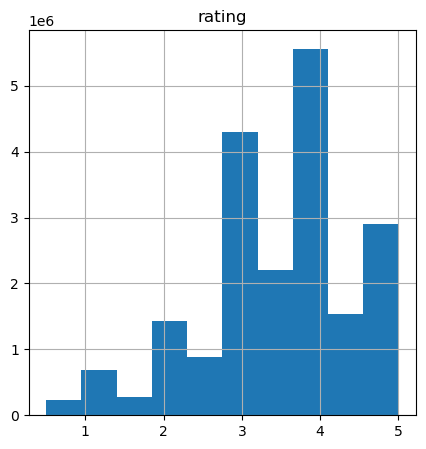

In [95]:
#se representa un histograma (tabla de frecuencias) con 10 barras para la columna rating
ratings.hist(bins=10, column='rating', figsize=(5,5))

<Axes: >

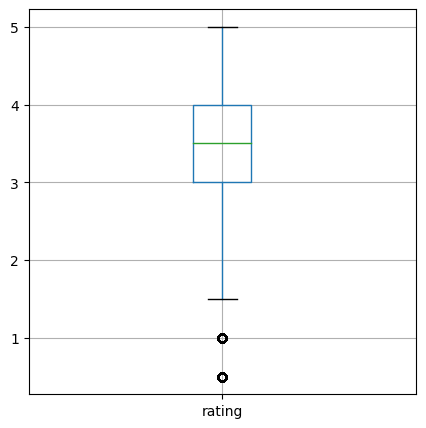

In [96]:
#gráfico de caja o de velas japonesas
#indica los cuartiles Q1(25%) y Q3(75%) donde se encuentran el 50% de los datos
#la raya roja indica la mediana y las rayas negras son el min y el max dentro del rango de datos típicos
ratings.boxplot(column='rating', figsize=(5,5))